<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

# I. EDA & Data Preprocessing

### Import libraries

In [133]:
# install plotly
!pip install plotly

In [316]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

### Load Data

In [173]:
# Import dataset
walmart_df = pd.read_csv("Data/Walmart_Store_sales.csv")

In [174]:
#target = weekly sales

# the unemployment rate or the fuel price, that might be useful for 
# predicting the amount of sales

#CPI : the consumer price index
#CPI : "Consumer price index" : This index measures the change in prices for the essential goods and services 
#that the least wealthy in our society must consume, such as rent, food and energ

### EDA

#### Basic info & stats of the data

In [266]:
print("Walmart_df :")
display(walmart_df)

display(walmart_df.info())

print("Basics statistics: ")
display(walmart_df.describe(include="all"))

print("Percentage of missing values : ")
display((walmart_df.isnull().sum()/walmart_df.shape[0]*100).sort_values(ascending=False))

Walmart_df :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
3,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
4,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,5,9
6,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011,8,19,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,7.0,2012-05-25,532739.77,0.0,50.60,3.804,197.588605,8.090,2012,5,25,5,21
103,3.0,2010-04-06,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,4,6,2,14
104,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,5,42
105,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,5,24


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 108
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         71 non-null     float64       
 1   Date          71 non-null     datetime64[ns]
 2   Weekly_Sales  71 non-null     float64       
 3   Holiday_Flag  71 non-null     float64       
 4   Temperature   71 non-null     float64       
 5   Fuel_Price    71 non-null     float64       
 6   CPI           71 non-null     float64       
 7   Unemployment  71 non-null     float64       
 8   year          71 non-null     int64         
 9   month         71 non-null     int64         
 10  day           71 non-null     int64         
 11  weekday       71 non-null     int64         
 12  weekyear      71 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 7.8 KB


None

Basics statistics: 


<ipython-input-266-08e5eea195e8>:7: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
count,71.000000,71,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.00000,71.000000,71.000000,71.000000,71.000000,71.000000
unique,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.985915,NaN,1.211318e+06,0.084507,59.709577,3.313662,178.792503,7.30707,2010.929577,6.605634,15.647887,4.591549,26.549296
std,6.255267,NaN,6.924102e+05,0.280126,17.160270,0.493802,39.546076,0.95294,0.850612,3.424612,8.530782,1.379207,14.968337
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.548000,126.139200,5.14300,2010.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,NaN,5.262815e+05,0.000000,45.020000,2.815500,132.560127,6.54450,2010.000000,4.000000,8.000000,5.000000,14.000000


Percentage of missing values : 


weekyear        0.0
weekday         0.0
day             0.0
month           0.0
year            0.0
Unemployment    0.0
CPI             0.0
Fuel_Price      0.0
Temperature     0.0
Holiday_Flag    0.0
Weekly_Sales    0.0
Date            0.0
Store           0.0
dtype: float64

#### Preprocessing with Pandas

In [267]:
# Missing values in Weekly_Sales
walmart_df[walmart_df["Weekly_Sales"].isnull()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear


In [268]:
walmart_df["Weekly_Sales"].isnull().sum()

0

In [269]:
walmart_df[walmart_df["Weekly_Sales"].isnull()].index

Int64Index([], dtype='int64')

In [270]:
# Drop rows with no values in target column Weekly_Sales
walmart_df = walmart_df.drop(walmart_df[walmart_df["Weekly_Sales"].isnull()].index)
walmart_df.shape

(71, 13)

In [271]:
walmart_df["Weekly_Sales"].isnull().any()

False

In [272]:
walmart_df["Date"].isnull().sum()

0

In [273]:
walmart_df[walmart_df["Date"].isnull()].index

Int64Index([], dtype='int64')

In [274]:
# Drop rows with Nan in Date column 
walmart_df = walmart_df.drop(walmart_df[walmart_df["Date"].isnull()].index)
walmart_df.shape

(71, 13)

In [275]:
walmart_df[walmart_df["Holiday_Flag"] != 0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
24,7.0,2012-10-02,563460.77,1.0,18.79,3.103,196.919506,8.256,2012,10,2,2,40
33,1.0,2010-12-02,1641957.44,1.0,38.51,2.548,211.242170,8.106,2010,12,2,4,48
77,8.0,2010-12-02,994801.40,1.0,33.34,2.548,214.621419,6.299,2010,12,2,4,48
79,20.0,2010-12-31,1799737.79,1.0,28.85,3.179,204.643227,7.484,2010,12,31,5,52
83,11.0,2010-11-26,1757242.51,1.0,69.90,2.735,215.061402,7.564,2010,11,26,5,47
89,7.0,2012-07-09,597876.55,1.0,57.84,3.596,198.095048,7.872,2012,7,9,1,28


In [276]:
walmart_df = walmart_df.drop(walmart_df[walmart_df["Holiday_Flag"].isnull()].index)
walmart_df.shape

(71, 13)

In [277]:
walmart_df = walmart_df.reset_index(drop=True)

In [278]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
3,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,5,9
4,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011,8,19,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,7.0,2012-05-25,532739.77,0.0,50.60,3.804,197.588605,8.090,2012,5,25,5,21
67,3.0,2010-04-06,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,4,6,2,14
68,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,5,42
69,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,5,24


In [279]:
#Convert date in datetime object
walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
display(walmart_df.head())
print("Date column format :", walmart_df["Date"].dtype)
print("Date type :", type(walmart_df["Date"][0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
3,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,5,9
4,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011,8,19,5,33


Date column format : datetime64[ns]
Date type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [280]:
print("year :", walmart_df["Date"][4].year)
print("month :", walmart_df["Date"][4].month)
print("Day :", walmart_df["Date"][4].day)
print("Day of Week :", walmart_df["Date"][4].isocalendar()[2])
print("Week of year :", walmart_df["Date"][4].isocalendar()[1])

year : 2011
month : 8
Day : 19
Day of Week : 5
Week of year : 33


In [281]:
# Create 5 new variables of date for new axes of analysis 
walmart_df['year'] = walmart_df['Date'].dt.year
walmart_df['month'] = walmart_df['Date'].dt.month
walmart_df['day'] = walmart_df['Date'].dt.day
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
3,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,5,9
4,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011,8,19,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,7.0,2012-05-25,532739.77,0.0,50.60,3.804,197.588605,8.090,2012,5,25,5,21
67,3.0,2010-04-06,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,4,6,2,14
68,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,5,42
69,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,5,24


In [282]:
weekday = []
weekyear = []
for i in range (walmart_df.shape[0]):
    weekday.append(walmart_df["Date"][i].isocalendar()[2])
    weekyear.append(walmart_df["Date"][i].isocalendar()[1])
walmart_df["weekday"] = weekday
walmart_df["weekyear"] = weekyear

In [283]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
1,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
2,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9
3,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,5,9
4,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011,8,19,5,33


In [284]:
len(walmart_df["Store"].unique())

19

#### Make some visualisation

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

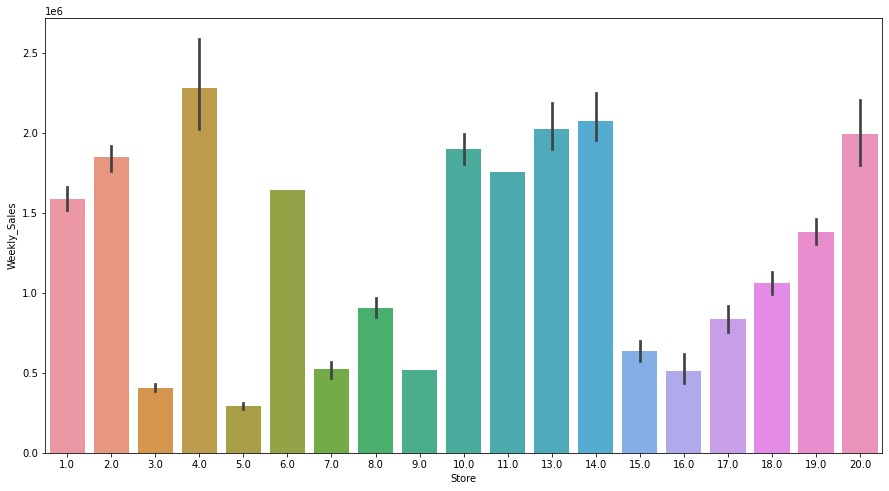

In [285]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(x="Store", y="Weekly_Sales", data=walmart_df)

In [286]:
fig = px.histogram(walmart_df,
                  x="weekyear",
                  y="Weekly_Sales",
                  nbins=53)
fig.update_layout(bargap=0.2)
fig.show(renderer="iframe_connected")

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

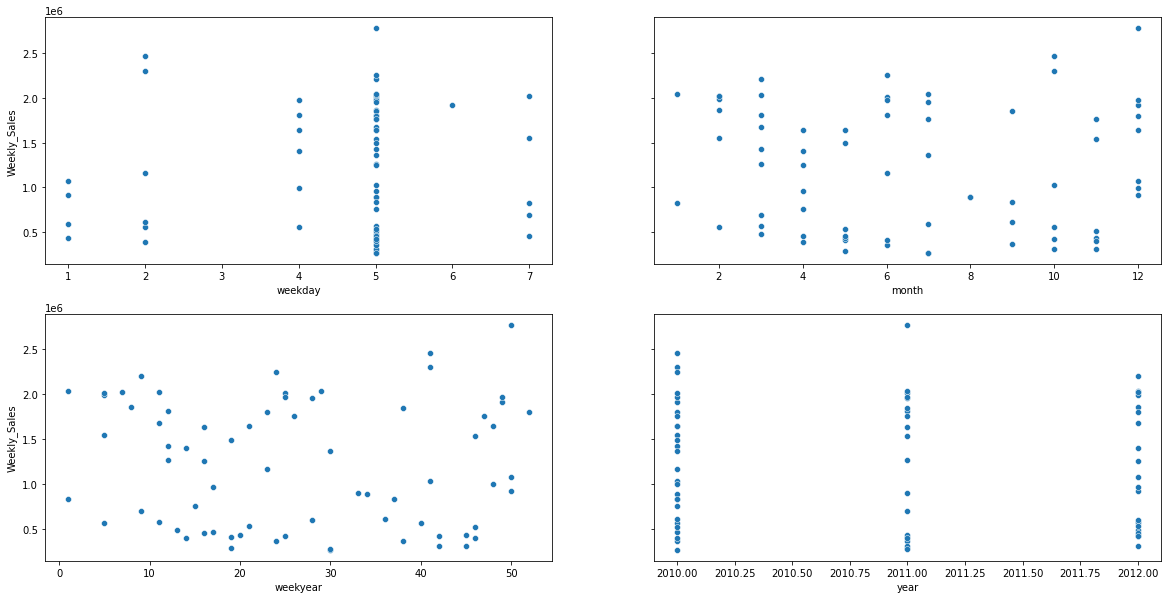

In [287]:
fig, ax = plt.subplots(2,2, figsize=(20,10), sharey=True)
sns.scatterplot(ax=ax[0,0], x="weekday", y="Weekly_Sales", data = walmart_df)
sns.scatterplot(ax=ax[0,1], x="month", y="Weekly_Sales", data = walmart_df)
sns.scatterplot(ax=ax[1,0], x="weekyear", y="Weekly_Sales", data = walmart_df)
sns.scatterplot(ax=ax[1,1], x="year", y="Weekly_Sales", data = walmart_df)

Drop lines containing invalid values or outliers : In this project, will be considered as outliers all the numeric features that don't fall within the range :  [𝑋¯−3𝜎,𝑋¯+3𝜎]
[
X
¯
−
3
σ
,
X
¯
+
3
σ
]
 . This concerns the columns : Temperature, Fuel_price, CPI and Unemployment

#### Drop lines with invalid values or outliers

<AxesSubplot:xlabel='Unemployment'>

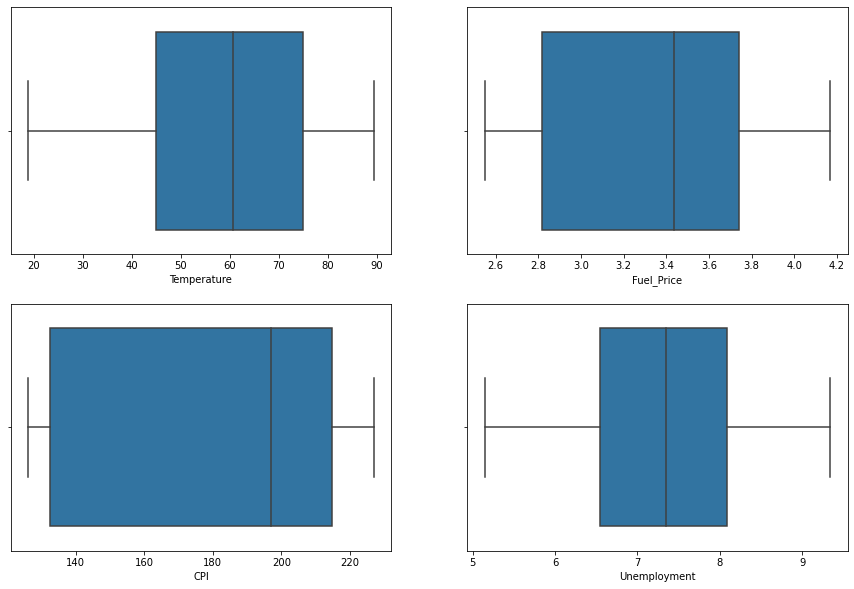

In [288]:
fig, ax = plt.subplots(2,2, figsize=(15,10), sharey=True)
sns.boxplot(ax=ax[0,0], x="Temperature", data=walmart_df)
sns.boxplot(ax=ax[0,1], x="Fuel_Price", data=walmart_df)
sns.boxplot(ax=ax[1,0], x="CPI", data=walmart_df)
sns.boxplot(ax=ax[1,1], x="Unemployment", data=walmart_df)

In [289]:
print('Dropping outliers in Unemployment : ')
to_keep = walmart_df['Unemployment'] < walmart_df['Unemployment'].mean() + 2*walmart_df['Unemployment'].std()
walmart_df = walmart_df.loc[to_keep,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

print('Dropping outliers in CPI : ')
to_keep1 = walmart_df['CPI'] < walmart_df['CPI'].mean() + 2*walmart_df['CPI'].std()
walmart_df = walmart_df.loc[to_keep1,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

print('Dropping outliers in Temperature : ')
to_keep2 = walmart_df['Temperature'] < walmart_df['Temperature'].mean() + 2*walmart_df['Temperature'].std()
walmart_df = walmart_df.loc[to_keep2,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

print('Dropping outliers in Fuel Price : ')
to_keep3 = walmart_df['Fuel_Price'] < walmart_df['Fuel_Price'].mean() + 2*walmart_df['Fuel_Price'].std()
walmart_df = walmart_df.loc[to_keep3,:]
print('Done. Number of lines remaining : ', walmart_df.shape[0])
print()

Dropping outliers in Unemployment : 
Done. Number of lines remaining :  69

Dropping outliers in CPI : 
Done. Number of lines remaining :  69

Dropping outliers in Temperature : 
Done. Number of lines remaining :  69

Dropping outliers in Fuel Price : 
Done. Number of lines remaining :  69



In [290]:
# check missing values
print("Percentage of missing values : ")
display((walmart_df.isnull().sum()/walmart_df.shape[0])*100)
print()

Percentage of missing values : 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
weekyear        0.0
dtype: float64

In [291]:
# Separate target variable Y from features X
print("Separating labels from features...")
todropfromfeatures = ["Date", "Weekly_Sales", "weekyear"]
features_list = [c for c in walmart_df.columns if c not in todropfromfeatures]
target_variable = "Weekly_Sales"

X = walmart_df.loc[:,features_list]
Y = walmart_df.loc[:,target_variable]

print("...Done.")
print()

print('Y .... : ')
print(Y.head())
print()
print("Y shape :", Y.shape)
print()
print('X .... :')
print(X.head())
print()
print("X shape :", X.shape)
print()

Separating labels from features...
...Done.

Y .... : 
0    1807545.43
1    1644470.66
2     695396.19
3    2203523.20
4     895066.50
Name: Weekly_Sales, dtype: float64

Y shape : (69,)

X .... :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0   13.0           0.0        42.38       3.435  128.616064         7.470   
1    6.0           0.0        78.89       2.759  212.412888         7.092   
2   15.0           0.0        69.80       4.069  134.855161         7.658   
3   20.0           0.0        39.93       3.617  213.023623         6.961   
4    8.0           0.0        82.92       3.554  219.070197         6.425   

   year  month  day  weekday  
0  2011      3   25        5  
1  2010      5   28        5  
2  2011      3    6        7  
3  2012      3    2        5  
4  2011      8   19        5  

X shape : (69, 10)



#### Preprocessing with Scikit-Learn

Explanatory variables (X) We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

Categorical variables : Store, Holiday_Flag
Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

In [292]:
# Divide dataset into train set & test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print("Train test split...Done...")
print()

Dividing into train and test sets...
Train test split...Done...



In [293]:
# Create pipeline for numeric features
numeric_features = [2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [294]:
# Create pipeline for categorical features
categorical_features = [0, 1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [295]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [296]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[:5])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[:5])
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[:5])
print()

Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
46   14.0           0.0        78.47       3.760  186.139981         8.625   
33   14.0           0.0        36.85       3.695  189.842483         8.424   
65    6.0           0.0        74.24       3.807  217.014694         6.855   
8    17.0           0.0        60.07       2.853  126.234600         6.885   
55   11.0           1.0        69.90       2.735  215.061402         7.564   

    year  month  day  weekday  
46  2011      7   15        5  
33  2012      2   17        5  
65  2011      4   22        5  
8   2010      1   10        7  
55  2010     11   26        5  
...Done.
  (0, 0)	1.1489719904390019
  (0, 1)	0.9681734234752677
  (0, 2)	0.10128041528087507
  (0, 3)	1.4835504690892352
  (0, 15)	1.0
  (1, 0)	-1.3001040890770879
  (1, 1)	0.8381794330552242
  (1, 2)	0.1982856674874245
  (1, 3)	1.24539392460682
  (1, 15)	1.0
  (2, 0)	0.900063008787078
  (2, 1)	

# II. Baseline model (linear regression)

#### Model training

In [297]:
# Train model 
model = LinearRegression()

In [298]:
print("Training model ...")
model.fit(X_train, Y_train) 
print("... Done.")

Training model ...
... Done.


#### Predictions

In [299]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

Predictions on training set...
...Done.
[2002419.34069981 2103682.77283868 1591593.04192802  871351.10161924
 1757242.50999319]



In [300]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 216903.51915285 1910831.00207088  488526.40959459 1531056.91382062
 1061168.65646909]



#### Performance evaluation

In [301]:
# Print scores
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9848758625322385
R2 score on test set :  0.9469005783467488


In [315]:
# MSE: Mean Squares error
print("MSE score on training set : ", mean_squared_error(Y_train, Y_train_pred))
print("MSE score on test set : ", mean_squared_error(Y_test, Y_test_pred))

MSE score on training set :  6708707265.321934
MSE score on test set :  34431272491.93123


In [302]:
# Display the coefficients of each of the explanatory variables
model.coef_

array([  -13110.96985908,   -84426.64609804,   665898.80788731,
          26944.3317773 ,   303270.71411616, -1187944.09841379,
        2260967.27618649, -1187628.32106394,   169155.22063803,
        -654641.94742141,  -655741.41974726, -1059332.23835282,
        1958784.33074625,   154128.97511926,  2061037.08944713,
        1057457.01970686,   514660.32993153,  -568475.05535302,
         859738.97842397,   989483.16365911,  1296963.70776587,
         496088.55421414,     7768.15520028])

In [312]:
coefs = pd.DataFrame(data = np.round(model.coef_, 2).transpose(), columns=["coefficients"])
coefs.sort_values("coefficients", ascending=False)

,coefficients
6,2260967.28
14,2061037.09
12,1958784.33
20,1296963.71
15,1057457.02
19,989483.16
18,859738.98
2,665898.81
16,514660.33
21,496088.55


# III. Fight overfitting

#### Regularized linear regression : RIDGE

In [333]:
# Perform cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("Cross-validation on Ridge...")
ridgeregressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Cross-validation on Ridge...
The cross-validated R2-score is :  0.6178837733752797
The standard deviation is :  0.1772901022252347


#### GridSearchCV on Ridge

In [324]:
# Perform grid search
print("Grid search...")
ridgeregressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0]
}
gridsearch = GridSearchCV(ridgeregressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.7405602296046302


In [325]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

Predictions on training set...
...Done.
[2024800.14509083 2021673.7104604  1581454.12453573  904528.5335695
 1734985.38172409]



In [326]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 323568.66800758 1742350.43169662  621327.17081323 1354840.03086071
 1099977.31455587]



In [327]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.979348939277137
R2 score on test set :  0.9062566888664646


#### Regression Lasso

In [332]:
# Perform cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("Cross-validation on Ridge...")
lassoregressor = Lasso()
scores = cross_val_score(lassoregressor, X_train, Y_train, cv=2)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Cross-validation on Ridge...
The cross-validated R2-score is :  0.6538024153964999
The standard deviation is :  0.10309414519360599


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30542677738.087486, tolerance: 1031816706.4076915

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 54070564086.35125, tolerance: 1146485308.6989658



In [336]:
# Perform grid search
print("Grid search...")
lassoregressor = Lasso()
# Grid of values to be tested
params2 = {'alpha' : [10**(-a) for a in range(10)]}
gridsearch2 = GridSearchCV(lassoregressor, param_grid = params, cv = 10, verbose=1)
gridsearch2.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch2.best_params_)
print("Best R2 score : ", gridsearch2.best_score_)

Grid search...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 161743415734.98972, tolerance: 2174347850.092328

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 73368608796.19077, tolerance: 2034778008.1313345

/op

...Done.
Best hyperparameters :  {'alpha': 1.0}
Best R2 score :  0.7265227980620051


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 169524748894.52423, tolerance: 2154852827.071017

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 174852596598.173, tolerance: 2210736600.7794595

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 182410735159.23593, tolerance: 2281687591.9218707

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:512: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 142339172786.56647, tolerance: 2231317

# Conclusion

With GridSearch and cross validation on Ridge, we can see that without regularization, the R2 varies between 0.44 and 0.78, whereas with a regularized model, we achieve a test score greater than 0.9